In [1]:
# Preamble load packages
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn import preprocessing
import re
from unidecode import unidecode
working_dir = "/Users/upar/Library/CloudStorage/OneDrive-UniversidaddelosAndes/03 MONEY/CESED/ANDI"
data_dir = "/Users/upar/Library/CloudStorage/OneDrive-UniversidaddelosAndes/03 MONEY/CESED/ANDI/Datos"


In [2]:

# ██████╗░░█████╗░████████╗░█████╗░  ██████╗░██████╗░░█████╗░░█████╗░███████╗░██████╗░██████╗██╗███╗░░██╗░██████╗░
# ██╔══██╗██╔══██╗╚══██╔══╝██╔══██╗  ██╔══██╗██╔══██╗██╔══██╗██╔══██╗██╔════╝██╔════╝██╔════╝██║████╗░██║██╔════╝░
# ██║░░██║███████║░░░██║░░░███████║  ██████╔╝██████╔╝██║░░██║██║░░╚═╝█████╗░░╚█████╗░╚█████╗░██║██╔██╗██║██║░░██╗░
# ██║░░██║██╔══██║░░░██║░░░██╔══██║  ██╔═══╝░██╔══██╗██║░░██║██║░░██╗██╔══╝░░░╚═══██╗░╚═══██╗██║██║╚████║██║░░╚██╗
# ██████╔╝██║░░██║░░░██║░░░██║░░██║  ██║░░░░░██║░░██║╚█████╔╝╚█████╔╝███████╗██████╔╝██████╔╝██║██║░╚███║╚██████╔╝
# ╚═════╝░╚═╝░░╚═╝░░░╚═╝░░░╚═╝░░╚═╝  ╚═╝░░░░░╚═╝░░╚═╝░╚════╝░░╚════╝░╚══════╝╚═════╝░╚═════╝░╚═╝╚═╝░░╚══╝░╚═════╝░

In [3]:
# Load main dataframe
main_df = gpd.read_file(f"{data_dir}/3-AnalysisData/delitos_por_upz.gpkg")
main_df.shape

(114, 74)

# Educación

## Resultados Pruebas Saber 11 (2021)

In [4]:
psaber = gpd.read_file(f"{data_dir}/Desarrollo/pruebassaber_2021_12-2.gpkg")
psaber.shape,psaber.columns

((1124, 63),
 Index(['ORDEN_DE_S', 'EMAIL', 'WEB', 'Fecha', 'COLEGIO_SE', 'P_Puntaje_',
        'EVALUADOS', 'COD_DANE12', 'P_Lectura', 'P_Matemati', 'P_Sociales',
        'P_Ciencias', 'P_Ingles', 'Sector', 'CALENDARIO', 'GENERO', 'COD_LOCA',
        'NATU_JUR', 'CLASE_TIPO', 'Ciencias_N', 'Ciencias_1', 'Ciencias_2',
        'Ciencias_3', 'Ingles_A', 'Ingles_A1', 'Ingles_A2', 'Ingles_B1',
        'Ingles_B', 'Lectura_1', 'Lectura_2', 'Lectura_3', 'Lectura_4',
        'Matematica', 'Matemati_1', 'Matemati_2', 'Matemati_3', 'SocialC_1',
        'SocialC_2', 'SocialC_3', 'SocialC_4', 'PCiencias_', 'PCiencias1',
        'PCiencia_1', 'PCiencia_2', 'PIngles_A1', 'PIngles_A2', 'PIngles_B1',
        'PIngles_A', 'PIngles_B', 'PLectura_1', 'PLectura_2', 'PLectura_3',
        'PLectura_4', 'PMatematic', 'PMatemat_1', 'PMatemat_2', 'PMatemat_3',
        'PSocialC_1', 'PSocialC_2', 'PSocialC_3', 'PSocialC_4', 'Categoria',
        'geometry'],
       dtype='object'))

<Axes: >

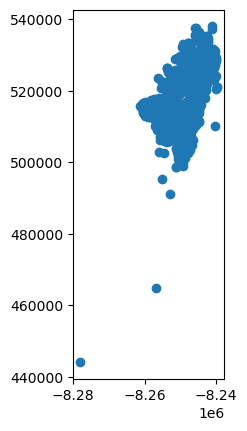

In [5]:
psaber.plot()

## Tasa Deserción (colegios oficiales y no oficiales)
- `Thombre_UPZ`: Porcentaje total por UPZ de niños que desertan.
- `Tmujer_UPZ`:Porcentaje total por UPZ de niñas que desertan. 

In [6]:
td_no_of_2021 = gpd.read_file(f"{data_dir}/Desarrollo/tdesercionnofupz_12_2021.gpkg")
td_of_2021 = gpd.read_file(f"{data_dir}/Desarrollo/tdesercionofupz_12_2021.gpkg")
td_no_of_2021.shape, td_of_2021.shape


((118, 36), (118, 34))

### Merge oficial y no oficial

In [7]:
print(td_no_of_2021.columns)
td_no_of_2021=td_no_of_2021.drop(columns=['H_Trans', 'M_Trans', 'H_Primero', 'M_Primero', 'H_Segundo',
       'M_Segundo', 'H_Tercero', 'M_Tercero', 'H_Cuarto', 'M_Cuarto',
       'H_Quinto', 'M_Quinto', 'H_Sexto', 'M_Sexto', 'H_Septimo', 'M_Septimo',
       'H_Octavo', 'M_Octavo', 'H_Noveno', 'M_Noveno', 'H_Decimo', 'M_Decimo',
       'H_Once', 'M_Once','H_Doce', 'M_Doce', 'H_Trece', 'M_Trece','Shape_Leng',
       'Shape_Area'])
td_no_of_2021.columns

Index(['H_Trans', 'M_Trans', 'H_Primero', 'M_Primero', 'H_Segundo',
       'M_Segundo', 'H_Tercero', 'M_Tercero', 'H_Cuarto', 'M_Cuarto',
       'H_Quinto', 'M_Quinto', 'H_Sexto', 'M_Sexto', 'H_Septimo', 'M_Septimo',
       'H_Octavo', 'M_Octavo', 'H_Noveno', 'M_Noveno', 'H_Decimo', 'M_Decimo',
       'H_Once', 'M_Once', 'Thombre_UP', 'Tmujer_UPZ', 'NOMBRE_UPZ', 'COD_UPZ',
       'H_Doce', 'M_Doce', 'H_Trece', 'M_Trece', 'relacion', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')


Index(['Thombre_UP', 'Tmujer_UPZ', 'NOMBRE_UPZ', 'COD_UPZ', 'relacion',
       'geometry'],
      dtype='object')

In [8]:
print(td_of_2021.columns)
td_of_2021=td_of_2021.drop(columns=['H_Trans', 'M_Trans', 'H_Primero', 'M_Primero', 'H_Segundo',
       'M_Segundo', 'H_Tercero', 'M_Tercero', 'H_Cuarto', 'M_Cuarto',
       'H_Quinto', 'M_Quinto', 'H_Sexto', 'M_Sexto', 'H_Septimo', 'M_Septimo',
       'H_Octavo', 'M_Octavo', 'H_Noveno', 'M_Noveno', 'H_Decimo', 'M_Decimo',
       'H_Once', 'M_Once','Shape_Leng',
       'Shape_Area','H_Acelerac', 'M_Acelerac'])
td_of_2021.columns

Index(['H_Trans', 'M_Trans', 'H_Primero', 'M_Primero', 'H_Segundo',
       'M_Segundo', 'H_Tercero', 'M_Tercero', 'H_Cuarto', 'M_Cuarto',
       'H_Quinto', 'M_Quinto', 'H_Sexto', 'M_Sexto', 'H_Septimo', 'M_Septimo',
       'H_Octavo', 'M_Octavo', 'H_Noveno', 'M_Noveno', 'H_Decimo', 'M_Decimo',
       'H_Once', 'M_Once', 'H_Acelerac', 'M_Acelerac', 'Thombre_UP',
       'Tmujer_UPZ', 'NOMBRE_UPZ', 'COD_UPZ', 'relacion', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')


Index(['Thombre_UP', 'Tmujer_UPZ', 'NOMBRE_UPZ', 'COD_UPZ', 'relacion',
       'geometry'],
      dtype='object')

In [9]:
td_of_2021['COD_UPZ']=td_of_2021['COD_UPZ'].apply(lambda x: x.replace("UPZ", ""))
td_no_of_2021['COD_UPZ']=td_no_of_2021['COD_UPZ'].apply(lambda x: x.replace("UPZ", ""))

In [10]:
td_2021=pd.merge(td_of_2021, td_no_of_2021, left_on='COD_UPZ', right_on='COD_UPZ', how='inner', suffixes=('_oficial', '_nooficial'))

In [11]:
td_2021=td_2021[['COD_UPZ','Thombre_UP_oficial', 'Tmujer_UPZ_oficial', 'Thombre_UP_nooficial','Tmujer_UPZ_nooficial']]
td_2021.COD_UPZ=td_2021.COD_UPZ.astype('int64')

In [12]:
# Revisar que haya 112 UPZs solamente
main_df.merge(td_2021, left_on='CODIGO_UPZ', right_on='COD_UPZ', how='left')['CODIGO_UPZ'].value_counts()

60     8
52     8
3      4
1      4
100    1
      ..
42     1
117    1
79     1
68     1
69     1
Name: CODIGO_UPZ, Length: 112, dtype: int64

#### Merge to main

In [13]:
main_df.drop(labels=[60, 1, 52], inplace=True)
main_df=main_df.merge(td_2021, left_on='CODIGO_UPZ', right_on='COD_UPZ', how='left')

# Drop problematic UPZs: 60, 1, 52
# main_df.set_index('CODIGO_UPZ', inplace=True)

In [14]:
# td_2021.drop(columns=['geometry_nooficial'], inplace=True)
# td_2021.rename(columns={'geometry_oficial':'geometry'}, inplace=True)
# td_2021=td_2021.set_geometry('geometry').to_crs(4326)
# td_2021.crs

In [15]:
main_df.columns

Index(['objectid', 'nombre', 'zona_estaci', 'decreto_pot', 'decreto',
       'shape_area', 'shape_len', 'codigo_id', 'escala_capt', 'fecha_captu',
       'responsable', 'globalid', 'CODIGO_LOCALIDAD', 'NOMBRE_LOCALIDAD',
       'CODIGO_UPZ', 'NOMBRE_UPZ', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'ESTRATO_count', 'ESTRATO_mean', 'ESTRATO_median',
       'ESTRATO_stddev', 'delitos_sexuales_2018', 'tasa_delitos_sexuales_2018',
       'homicidios_2018', 'tasa_homicidios_2018', 'homicidios_2019',
       'tasa_homicidios_2019', 'homicidios_2020', 'tasa_homicidios_2020',
       'homicidios_2021', 'tasa_homicidios_2021',
       'violencia_intrafamiliar_2018', 'tasa_violencia_intrafamiliar_2018',
       'hurto_a_personas_2018', 'tasa_hurto_a_personas_2018',
       'hurto_a_personas_2019', 'tasa_hurto_a_personas_2019',
       'hurto_a_personas_2020', 'tasa_hurto_a_personas_2020',
       'hurto_a_personas_2021', 'tasa_hurto_a_personas_2021',
       'hurto_a_residencias_2018'

## EM: Promedio de años de educación para personas de 15 años y más, por grupos de edad y sexo (promedio)
Anexo_personas_EM_2021

Cuadro 308B

In [16]:
# EM_308B 
f=pd.ExcelFile(f"{data_dir}/1-InputData/Encuesta Multiproposito/2021/Anexo_personas_EM_2021.xlsx")
EM_308B=f.parse('Cuadro 308B', skiprows=14, nrows=80)

In [17]:
EM_308B['Unnamed: 0']=EM_308B['Unnamed: 0'].apply(lambda x: unidecode(x).upper())
EM_308B.rename(columns={'Unnamed: 0':'nombre'}, inplace=True)
EM_308B.loc[31,'nombre']="JERUSALEM"

In [18]:
EM_308B.drop(columns=[i for i in EM_308B.columns if ("CVE" in i)|("IC" in i)|("Unnamed" in i)], inplace=True)

In [19]:
EM_308B=EM_308B[['nombre','Promedio', 'Promedio.4','Promedio.8']]

In [20]:
EM_308B=EM_308B.rename(columns={'Promedio':'308B_prom',
                        'Promedio.4':'308B_prom_H',
                        'Promedio.8':'308B_prom_M'})
EM_308B.head()

nombre  308B_prom  308B_prom_H  308B_prom_M
0   20 DE JULIO  10.554698    10.574912    10.536342
1      AMERICAS  12.579219    12.733267    12.442844
2        APOGEO  11.052947    11.106932    11.003856
3  ARBORIZADORA  11.811676    11.931707    11.703395
4       BOLIVIA  13.418499    13.591398    13.277875

### Merge with main

In [21]:
main_merge=main_df.merge(EM_308B, left_on='nombre', right_on='nombre', how='left')

## EM: Personas de 15 años y más según nivel educativo más alto alcanzado (participación %)				
Cuado 309B

In [22]:
EM_309B=f.parse('Cuadro 309B', skiprows=14, nrows=80)
EM_309B.head()

Unnamed: 0    Total          Cve%        IC(+-)  Unnamed: 4     Total.1  \
0   20 de Julio  65106.0  5.716000e-15  7.275960e-12         NaN  602.041993   
1      Américas  66671.0  5.904640e-15  1.455190e-11         NaN  539.197135   
2        Apogeo  29973.0  7.270790e-15  3.637980e-12         NaN  354.562498   
3  Arborizadora  66861.0  7.713080e-15  1.455190e-11         NaN  367.446922   
4       Bolivia  72923.0  7.573690e-15  1.455190e-11         NaN  180.750577   

      Cve%.1    IC(+-).1         %     Cve%.2  ...        %.6   Cve%.14  \
0  20.259421  239.061638  0.924710  20.259421  ...  15.907194  6.080030   
1  24.064177  254.316568  0.808743  24.064177  ...  32.382224  4.546132   
2  17.604287  122.339674  1.182940  17.604287  ...  20.374017  5.454314   
3  29.652431  213.555613  0.549568  29.652431  ...  23.948363  5.516969   
4  42.787131  151.582453  0.247865  42.787131  ...  41.311114  3.259390   

   IC(+-).14  Unnamed: 53      Total.8    Cve%.15    IC(+-).15       %.7  \
0   1.895638          NaN  1373.889677  15.594693   419.937588  2.110235   
1   2.885392          NaN  5824.821468  10.077256  1150.485102  8.736664   
2   2.178075          NaN   983.909368  13.849328   267.079077  3.282652   
3   2.589599          NaN  3731.198972  16.081086  1176.033952  5.580531   
4   2.639121          NaN  7003.965292   7.944053  1090.541435  9.604604   

     Cve%.16  IC(+-).16  
0  15.594693   0.645006  
1  10.077256   1.725615  
2  13.849328   0.891066  
3  16.081086   1.758924  
4   7.944053   1.495470  

[5 rows x 60 columns]

In [23]:
EM_309B['Unnamed: 0']=EM_309B['Unnamed: 0'].apply(lambda x: unidecode(x).upper())
EM_309B.rename(columns={'Unnamed: 0':'nombre'}, inplace=True)
EM_308B.loc[31,'nombre']="JERUSALEM"

In [24]:
print(EM_309B.columns)
EM_309B=EM_309B.drop(columns=[i for i in EM_309B.columns if ("Cve" in i)| ("Unnamed" in i)|("IC" in i)|("Total" in i)])
EM_309B=EM_309B[['nombre','%.2','%.3']]
EM_309B

Index(['nombre', 'Total', 'Cve%', 'IC(+-)', 'Unnamed: 4', 'Total.1', 'Cve%.1',
       'IC(+-).1', '%', 'Cve%.2', 'IC(+-).2', 'Unnamed: 11', 'Total.2',
       'Cve%.3', 'IC(+-).3', '%.1', 'Cve%.4', 'IC(+-).4', 'Unnamed: 18',
       'Total.3', 'Cve%.5', 'IC(+-).5', '%.2', 'Cve%.6', 'IC(+-).6',
       'Unnamed: 25', 'Total.4', 'Cve%.7', 'IC(+-).7', '%.3', 'Cve%.8',
       'IC(+-).8', 'Unnamed: 32', 'Total.5', 'Cve%.9', 'IC(+-).9', '%.4',
       'Cve%.10', 'IC(+-).10', 'Unnamed: 39', 'Total.6', 'Cve%.11',
       'IC(+-).11', '%.5', 'Cve%.12', 'IC(+-).12', 'Unnamed: 46', 'Total.7',
       'Cve%.13', 'IC(+-).13', '%.6', 'Cve%.14', 'IC(+-).14', 'Unnamed: 53',
       'Total.8', 'Cve%.15', 'IC(+-).15', '%.7', 'Cve%.16', 'IC(+-).16'],
      dtype='object')


nombre        %.2        %.3
0    20 DE JULIO  16.487123  12.038097
1       AMERICAS   8.297219   6.926341
2         APOGEO  16.846893  11.394003
3   ARBORIZADORA  10.142247   8.505170
4        BOLIVIA   5.012889   4.588349
..           ...        ...        ...
75       USAQUEN   1.942741   3.454376
76      VERBENAL  12.463675   8.320631
77   LA ALHAMBRA   1.564661   2.785672
78   LA FLORESTA   3.194211   4.067378
79        ALAMOS   4.994895   5.441516

[80 rows x 3 columns]

In [25]:
EM_309B=EM_309B.rename(columns={'%.2':'309B_share_bprimaria',
                                '%.3':'309B_share_bsecundaria'})
EM_309B.head()

nombre  309B_share_bprimaria  309B_share_bsecundaria
0   20 DE JULIO             16.487123               12.038097
1      AMERICAS              8.297219                6.926341
2        APOGEO             16.846893               11.394003
3  ARBORIZADORA             10.142247                8.505170
4       BOLIVIA              5.012889                4.588349

### Merge with main

In [26]:
main_merge=main_merge.merge(EM_309B, left_on='nombre', right_on='nombre', how='left')
main_merge.shape, main_merge.columns

((129, 84),
 Index(['objectid', 'nombre', 'zona_estaci', 'decreto_pot', 'decreto',
        'shape_area', 'shape_len', 'codigo_id', 'escala_capt', 'fecha_captu',
        'responsable', 'globalid', 'CODIGO_LOCALIDAD', 'NOMBRE_LOCALIDAD',
        'CODIGO_UPZ', 'NOMBRE_UPZ', '2018', '2019', '2020', '2021', '2022',
        '2023', '2024', 'ESTRATO_count', 'ESTRATO_mean', 'ESTRATO_median',
        'ESTRATO_stddev', 'delitos_sexuales_2018', 'tasa_delitos_sexuales_2018',
        'homicidios_2018', 'tasa_homicidios_2018', 'homicidios_2019',
        'tasa_homicidios_2019', 'homicidios_2020', 'tasa_homicidios_2020',
        'homicidios_2021', 'tasa_homicidios_2021',
        'violencia_intrafamiliar_2018', 'tasa_violencia_intrafamiliar_2018',
        'hurto_a_personas_2018', 'tasa_hurto_a_personas_2018',
        'hurto_a_personas_2019', 'tasa_hurto_a_personas_2019',
        'hurto_a_personas_2020', 'tasa_hurto_a_personas_2020',
        'hurto_a_personas_2021', 'tasa_hurto_a_personas_2021',
       

# Economía

## EM: Hogares según percepción del jefe/a o cónyuge sobre la suficiencia de los ingresos del hogar. Bogotá, 80 UPZ y 15 grupos de UPZ
Anexo_hogares_2021, 211B:

- `EM_211B_no`: No alcanzan para cubrir los gastos mínimos
- `EM_211B_solo`: Solo alcanzan para cubrir los gastos mínimos
- `EM_211B_cubre`: Cubren más que los gastos mínimos

In [27]:
f = pd.ExcelFile(f"{data_dir}/1-InputData/Encuesta Multiproposito/2021/Anexo_hogares_EM_2021.xlsx")
EM_211B=f.parse('Cuadro 211B', skiprows=13, nrows=80)

In [28]:
EM_211B['Unnamed: 0']=EM_211B['Unnamed: 0'].apply(lambda x: unidecode(x).upper())
EM_211B.rename(columns={'Unnamed: 0':'nombre'}, inplace=True)

In [29]:
EM_211B.loc[31,'nombre']="JERUSALEM"
len(set(EM_211B['nombre']).intersection(set(main_merge['nombre'])))

78

In [30]:
EM_211B=EM_211B.drop(columns=[i for i in EM_211B.columns if ("CVE" in i)|
                      ("Unnamed" in i)|
                      ("IC" in i)])
EM_211B.head()

nombre         Total      Total.1          %       Total.2  \
0   20 DE JULIO  26907.764569  8580.737341  31.889447  16447.693482   
1      AMERICAS  30997.881104  3581.811936  11.555022  20069.412853   
2        APOGEO  11491.694367  3201.962577  27.863277   6860.384559   
3  ARBORIZADORA  27114.366532  4685.138403  17.279173  17809.434277   
4       BOLIVIA  31675.967730  4535.490127  14.318395  19518.385442   

         %.1      Total.3        %.2  
0  61.126198  1879.333746   6.984355  
1  64.744467  7346.656315  23.700511  
2  59.698634  1429.347232  12.438090  
3  65.682649  4619.793852  17.038177  
4  61.618908  7622.092161  24.062697

In [31]:
# Quedarme con las columnas que necesito
EM_211B=EM_211B[['nombre','%', '%.1','%.2']]
EM_211B

nombre          %        %.1        %.2
0    20 DE JULIO  31.889447  61.126198   6.984355
1       AMERICAS  11.555022  64.744467  23.700511
2         APOGEO  27.863277  59.698634  12.438090
3   ARBORIZADORA  17.279173  65.682649  17.038177
4        BOLIVIA  14.318395  61.618908  24.062697
..           ...        ...        ...        ...
75       USAQUEN   5.323169  24.466434  70.210397
76      VERBENAL  18.346866  57.538878  24.114256
77   LA ALHAMBRA   8.903969  30.963705  60.132327
78   LA FLORESTA   6.128405  38.415891  55.455705
79        ALAMOS  14.400684  58.249880  27.349436

[80 rows x 4 columns]

In [32]:
EM_211B=EM_211B.rename(columns={'%':'EM_211B_no',
                                '%.1':'EM_211B_solo',
                                '%.2':'EM_211B_cubre'})
EM_211B.head()

nombre  EM_211B_no  EM_211B_solo  EM_211B_cubre
0   20 DE JULIO   31.889447     61.126198       6.984355
1      AMERICAS   11.555022     64.744467      23.700511
2        APOGEO   27.863277     59.698634      12.438090
3  ARBORIZADORA   17.279173     65.682649      17.038177
4       BOLIVIA   14.318395     61.618908      24.062697

### Merge with main

In [33]:
main_merge=main_merge.merge(EM_211B, left_on='nombre', right_on='nombre', how='left')
main_merge.shape, main_merge.columns

((129, 87),
 Index(['objectid', 'nombre', 'zona_estaci', 'decreto_pot', 'decreto',
        'shape_area', 'shape_len', 'codigo_id', 'escala_capt', 'fecha_captu',
        'responsable', 'globalid', 'CODIGO_LOCALIDAD', 'NOMBRE_LOCALIDAD',
        'CODIGO_UPZ', 'NOMBRE_UPZ', '2018', '2019', '2020', '2021', '2022',
        '2023', '2024', 'ESTRATO_count', 'ESTRATO_mean', 'ESTRATO_median',
        'ESTRATO_stddev', 'delitos_sexuales_2018', 'tasa_delitos_sexuales_2018',
        'homicidios_2018', 'tasa_homicidios_2018', 'homicidios_2019',
        'tasa_homicidios_2019', 'homicidios_2020', 'tasa_homicidios_2020',
        'homicidios_2021', 'tasa_homicidios_2021',
        'violencia_intrafamiliar_2018', 'tasa_violencia_intrafamiliar_2018',
        'hurto_a_personas_2018', 'tasa_hurto_a_personas_2018',
        'hurto_a_personas_2019', 'tasa_hurto_a_personas_2019',
        'hurto_a_personas_2020', 'tasa_hurto_a_personas_2020',
        'hurto_a_personas_2021', 'tasa_hurto_a_personas_2021',
       

## EM: Hogares según opinión del jefe/a o cónyuge respecto a si se considera pobre. 80 UPZ y 15 grupos de UPZ
Anexo_hogares_2021, 212B

- `EM_212B_si`: Sí se considera pobre
- `EM_212B_no`: No se considera pobre

In [34]:
EM_212B=f.parse('Cuadro 212B', skiprows=13, nrows=80)

In [35]:
EM_212B['Unnamed: 0']=EM_212B['Unnamed: 0'].apply(lambda x: unidecode(x).upper())
EM_212B.rename(columns={'Unnamed: 0':'nombre'}, inplace=True)

In [36]:
EM_212B.loc[31,'nombre']="JERUSALEM"
len(set(EM_212B['nombre']).intersection(set(main_merge['nombre'])))

78

In [37]:
EM_212B=EM_212B.drop(columns=[i for i in EM_212B.columns if ("Unnamed" in i)|
                      ("IC" in i) |
                      ("Total" in i)|
                      ("CVE" in i)])
EM_212B.head()

nombre          %        %.1
0   20 DE JULIO  38.575239  61.424761
1      AMERICAS  14.464844  85.535156
2        APOGEO  31.307402  68.692598
3  ARBORIZADORA  29.048908  70.951092
4       BOLIVIA   9.894985  90.105015

In [38]:
# Cambiarle nombre a variables
EM_212B=EM_212B.rename(columns={'%':'EM_212B_si',
                                '%.1':'EM_212B_no'})
EM_212B.head()

nombre  EM_212B_si  EM_212B_no
0   20 DE JULIO   38.575239   61.424761
1      AMERICAS   14.464844   85.535156
2        APOGEO   31.307402   68.692598
3  ARBORIZADORA   29.048908   70.951092
4       BOLIVIA    9.894985   90.105015

### Merge with main

In [39]:
main_merge=main_merge.merge(EM_212B, left_on='nombre', right_on='nombre', how='left')
main_merge.shape, main_merge.columns

((129, 89),
 Index(['objectid', 'nombre', 'zona_estaci', 'decreto_pot', 'decreto',
        'shape_area', 'shape_len', 'codigo_id', 'escala_capt', 'fecha_captu',
        'responsable', 'globalid', 'CODIGO_LOCALIDAD', 'NOMBRE_LOCALIDAD',
        'CODIGO_UPZ', 'NOMBRE_UPZ', '2018', '2019', '2020', '2021', '2022',
        '2023', '2024', 'ESTRATO_count', 'ESTRATO_mean', 'ESTRATO_median',
        'ESTRATO_stddev', 'delitos_sexuales_2018', 'tasa_delitos_sexuales_2018',
        'homicidios_2018', 'tasa_homicidios_2018', 'homicidios_2019',
        'tasa_homicidios_2019', 'homicidios_2020', 'tasa_homicidios_2020',
        'homicidios_2021', 'tasa_homicidios_2021',
        'violencia_intrafamiliar_2018', 'tasa_violencia_intrafamiliar_2018',
        'hurto_a_personas_2018', 'tasa_hurto_a_personas_2018',
        'hurto_a_personas_2019', 'tasa_hurto_a_personas_2019',
        'hurto_a_personas_2020', 'tasa_hurto_a_personas_2020',
        'hurto_a_personas_2021', 'tasa_hurto_a_personas_2021',
       

## EM: Hogares según medidas tomadas para hacer frente a los efectos económicos de la pandemia del coronavirus (COVID-19)

- `EM_213B_none`: No tomaron ninguna de las siguientes medidas para hacer frente a los efectos de la pandemia:
  - Uno o más miembros del hogar que no trabajaban empezaron a trabajar
  - Adoptaron nuevas fuentes de infreso
  - Cambiaron de vivienda
  - Gastaron parte o todos sus ahorros
  - Se endeudaron o ampliaron el plazo de alguna(s) deuda(s)
  - Vendieron algunos bienes o activos 
  - Arrendaron o hiptecaron la vivienda ocupada por el hogar
  - Algún miembro del hogar tuvo que retirarse de la escuela, colegio, jardín, universidad o carrera técnica o tecnológica
  - Disminuyeron el gasto en alimentos 					
  - Pidieron ayuda de familiares, amigos u otras personas del barrio, pueblo o vereda					
  - Solicitaron subsidio de desempleo

In [40]:
# Cargar base de datos
EM_213B=f.parse('Cuadro 213B', skiprows=13, nrows=80)

In [41]:
EM_213B['Unnamed: 0']=EM_213B['Unnamed: 0'].apply(lambda x: unidecode(x).upper())
EM_213B.rename(columns={'Unnamed: 0':'nombre'}, inplace=True)

In [42]:
EM_213B.loc[31,'nombre']="JERUSALEM"
len(set(EM_213B['nombre']).intersection(set(main_merge['nombre'])))

78

In [43]:
# Quedarme con columnas de interés
EM_213B=EM_213B[['nombre','%.11']]

# Cambiar nombre de columnas
EM_213B=EM_213B.rename(columns={'%.11':'EM_213B_none'})
EM_213B.head()

nombre  EM_213B_none
0   20 DE JULIO     16.104661
1      AMERICAS     48.566969
2        APOGEO     21.299729
3  ARBORIZADORA     31.977026
4       BOLIVIA     48.211301

### Merge with main

In [44]:
main_merge=main_merge.merge(EM_213B, left_on='nombre', right_on='nombre', how='left')
main_merge.shape, main_merge.columns

((129, 90),
 Index(['objectid', 'nombre', 'zona_estaci', 'decreto_pot', 'decreto',
        'shape_area', 'shape_len', 'codigo_id', 'escala_capt', 'fecha_captu',
        'responsable', 'globalid', 'CODIGO_LOCALIDAD', 'NOMBRE_LOCALIDAD',
        'CODIGO_UPZ', 'NOMBRE_UPZ', '2018', '2019', '2020', '2021', '2022',
        '2023', '2024', 'ESTRATO_count', 'ESTRATO_mean', 'ESTRATO_median',
        'ESTRATO_stddev', 'delitos_sexuales_2018', 'tasa_delitos_sexuales_2018',
        'homicidios_2018', 'tasa_homicidios_2018', 'homicidios_2019',
        'tasa_homicidios_2019', 'homicidios_2020', 'tasa_homicidios_2020',
        'homicidios_2021', 'tasa_homicidios_2021',
        'violencia_intrafamiliar_2018', 'tasa_violencia_intrafamiliar_2018',
        'hurto_a_personas_2018', 'tasa_hurto_a_personas_2018',
        'hurto_a_personas_2019', 'tasa_hurto_a_personas_2019',
        'hurto_a_personas_2020', 'tasa_hurto_a_personas_2020',
        'hurto_a_personas_2021', 'tasa_hurto_a_personas_2021',
       

# Agregar crímenes violentos y a la propiedad

## Crímenes violentos

In [53]:
# List with violent crimes
v=[i for i in  main_merge if "tasa" in i and (("homicidios" in i) | ("violencia_intrafamiliar" in i)| 
                                          ("delitos_sexuales" in i))]
v

['tasa_delitos_sexuales_2018',
 'tasa_homicidios_2018',
 'tasa_homicidios_2019',
 'tasa_homicidios_2020',
 'tasa_homicidios_2021',
 'tasa_violencia_intrafamiliar_2018']

In [58]:
display(main_merge[v].head())
main_merge['crimenes_violentos_sum']=main_merge[v].sum(axis=1)

tasa_delitos_sexuales_2018  tasa_homicidios_2018  tasa_homicidios_2019  \
0                       82.97                  8.89                  8.45   
1                       14.04                  0.00                  0.00   
2                      275.68                 67.39                 89.65   
3                      378.98                  0.00                  0.00   
4                       69.25                  8.46                  8.29   

   tasa_homicidios_2020  tasa_homicidios_2021  \
0                  5.34                 10.28   
1                  2.51                  9.65   
2                 70.38                116.60   
3                  9.25                 18.17   
4                  8.88                  7.32   

   tasa_violencia_intrafamiliar_2018  
0                             423.72  
1                             272.32  
2                             735.16  
3                             797.85  
4                             491.69

In [49]:
# Set list with property crimes
p=[i for i in main_merge.columns if "tasa" in i and
 ("hurto" in i)]
p

['tasa_hurto_a_personas_2018',
 'tasa_hurto_a_personas_2019',
 'tasa_hurto_a_personas_2020',
 'tasa_hurto_a_personas_2021',
 'tasa_hurto_a_residencias_2018',
 'tasa_hurto_automotores_2018',
 'tasa_hurto_automotores_2019',
 'tasa_hurto_automotores_2020',
 'tasa_hurto_automotores_2021',
 'tasa_hurto_motocicletas_2018',
 'tasa_hurto_motocicletas_2019',
 'tasa_hurto_motocicletas_2020',
 'tasa_hurto_motocicletas_2021',
 'tasa_hurto_comercios_2018',
 'tasa_hurto_comercios_2019',
 'tasa_hurto_comercios_2020',
 'tasa_hurto_comercios_2021']

In [60]:
# main_merge['crimenes_propiedad_sum']=
main_merge['crimenes_propiedad_sum']=main_merge[p].sum(axis=1)

# Export database for UPZ

In [61]:
main_merge.to_file(f"{data_dir}/3-AnalysisData/Bases listas/upz.gpkg", driver="GPKG")